# missingo demonstration
Adapted from https://github.com/ResidentMario/missingno

This sample uses a sample of the NYPD Motor Vehicle Collisions Dataset dataset (https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95). To get the data yourself, run the following on your command line:
```
$ pip install quilt
$ quilt install ResidentMario/missingno_data
```

In [1]:
import numpy as np
import pandas as pd
from quilt.data.ResidentMario import missingno_data

collisions = missingno_data.nyc_collision_factors()
collisions = collisions.replace("nan", np.nan)

In [2]:
print(collisions.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7303 entries, 0 to 7302
Data columns (total 27 columns):
Unnamed: 0                       7303 non-null int64
DATE                             7303 non-null object
TIME                             7303 non-null object
BOROUGH                          6920 non-null object
ZIP CODE                         6919 non-null float64
LATITUDE                         7303 non-null float64
LONGITUDE                        7303 non-null float64
LOCATION                         7303 non-null object
ON STREET NAME                   6238 non-null object
CROSS STREET NAME                6166 non-null object
OFF STREET NAME                  761 non-null object
NUMBER OF PERSONS INJURED        7303 non-null int64
NUMBER OF PERSONS KILLED         7303 non-null int64
NUMBER OF PEDESTRIANS INJURED    7303 non-null int64
NUMBER OF PEDESTRIANS KILLED     7303 non-null int64
NUMBER OF CYCLISTS INJURED       0 non-null float64
NUMBER OF CYCLISTS KILLED        0

In [3]:
collisions.head()

,Unnamed: 0,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0,11/10/2016,16:11:00,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
1,1,11/10/2016,05:11:00,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,2,04/16/2016,09:15:00,BROOKLYN,11201.0,40.687999,-73.997563,"(40.6879989, -73.9975625)",HENRY STREET,WARREN STREET,...,Lost Consciousness,Lost Consciousness,NaN,NaN,NaN,PASSENGER VEHICLE,VAN,NaN,NaN,NaN
3,3,04/15/2016,10:20:00,QUEENS,11375.0,40.719228,-73.854542,"(40.7192276, -73.8545422)",NaN,NaN,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
4,4,04/15/2016,10:35:00,BROOKLYN,11210.0,40.632147,-73.952731,"(40.6321467, -73.9527315)",BEDFORD AVENUE,CAMPUS ROAD,...,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [4]:
collisions.describe()

,Unnamed: 0,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLISTS INJURED,NUMBER OF CYCLISTS KILLED
count,7303.000000,6919.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,0.0,0.0
mean,3651.000000,10900.746640,40.717653,-73.921406,0.350678,0.000959,0.133644,0.000822,NaN,NaN
std,2108.338841,551.568724,0.069437,0.083317,0.707873,0.030947,0.362129,0.028653,NaN,NaN
min,0.000000,10001.000000,40.502341,-74.248277,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1825.500000,10310.000000,40.670865,-73.980744,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,3651.000000,11211.000000,40.723260,-73.933888,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,5476.500000,11355.000000,40.759527,-73.864463,1.000000,0.000000,0.000000,0.000000,NaN,NaN
max,7302.000000,11694.000000,40.909628,-73.702590,16.000000,1.000000,3.000000,1.000000,NaN,NaN


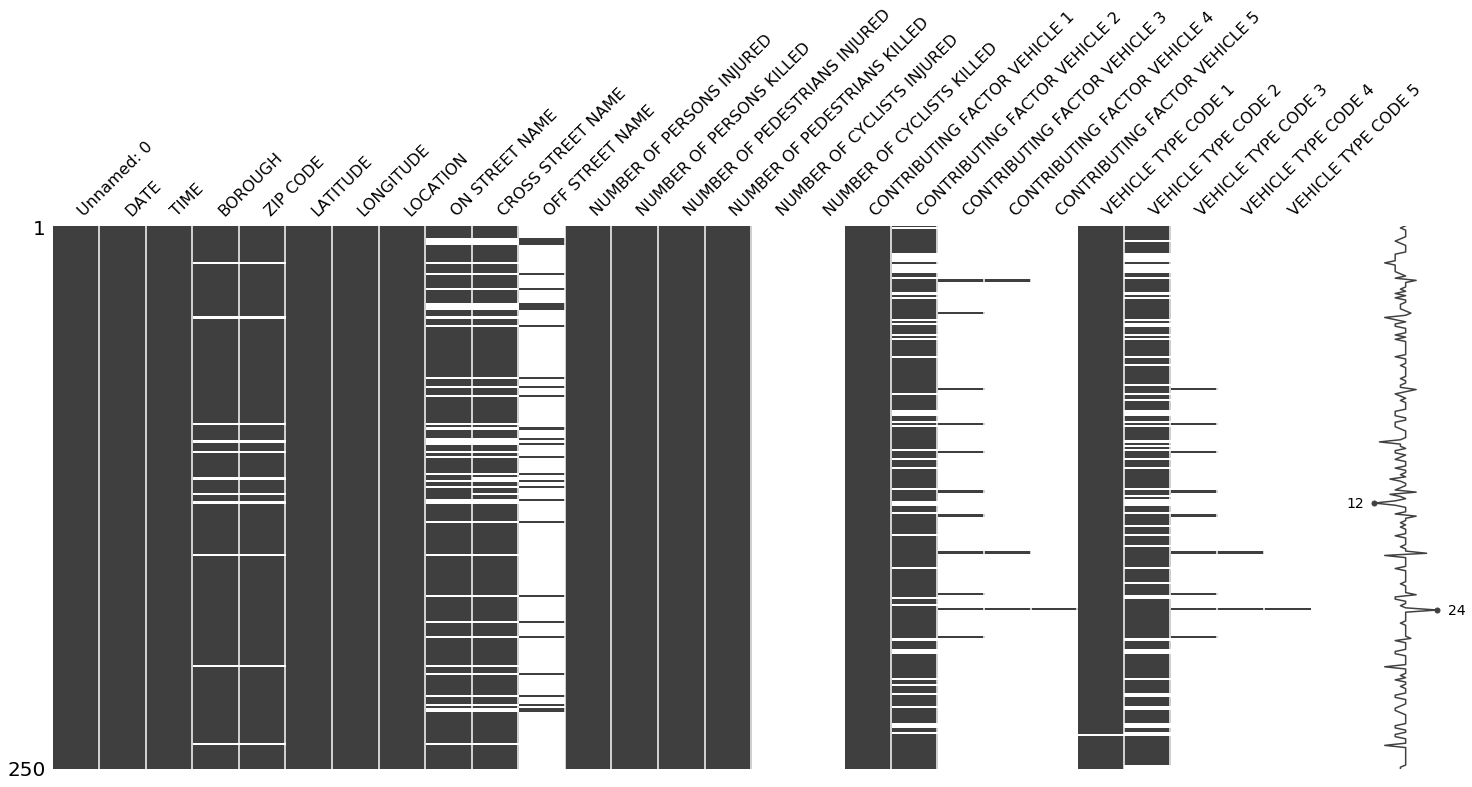

In [5]:
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

At a glance, date, time, the distribution of injuries, and the contribution factor of the first vehicle appear to be completely populated, while geographic information seems mostly complete, but spottier.

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

This visualization will comfortably accommodate up to 50 labelled variables. Past that range labels begin to overlap or become unreadable, and by default large displays omit them.

## Time-Series Matrix Example

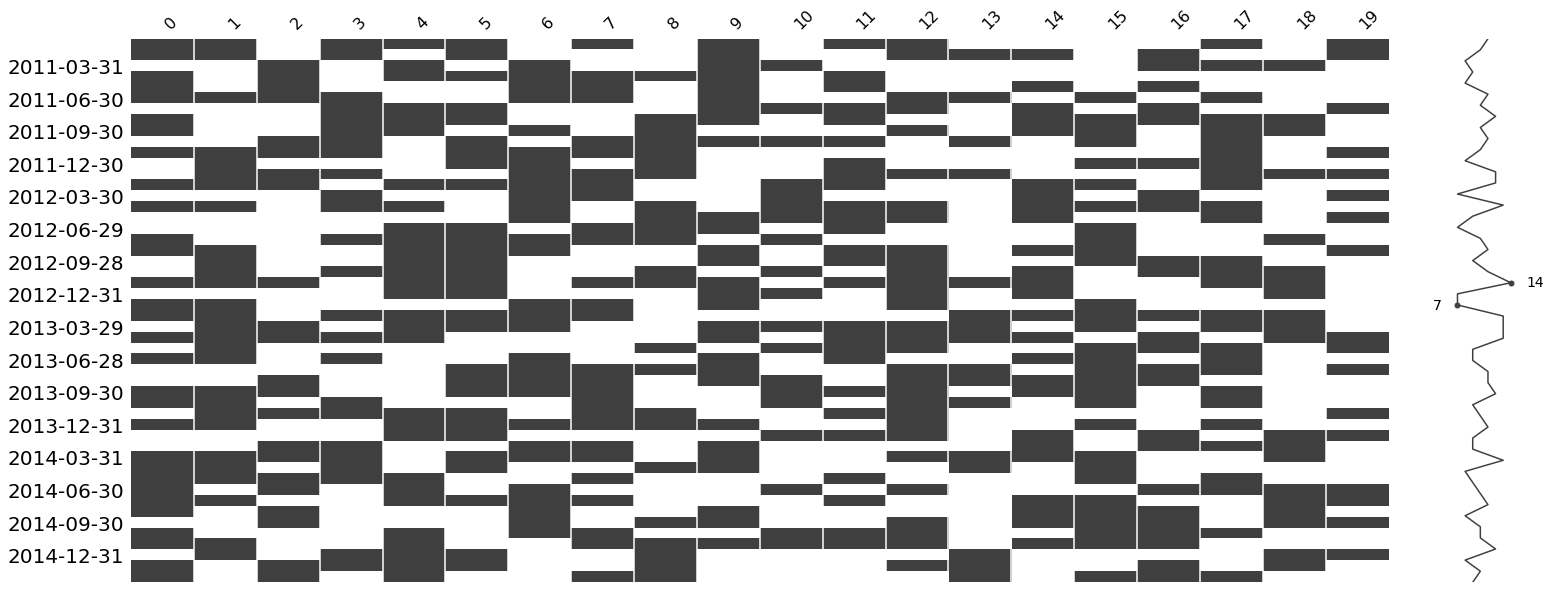

In [6]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)
null_pattern = pd.DataFrame(null_pattern).replace({False: None})
msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')

## Bar Chart

msno.bar - visualizes nullity by columns

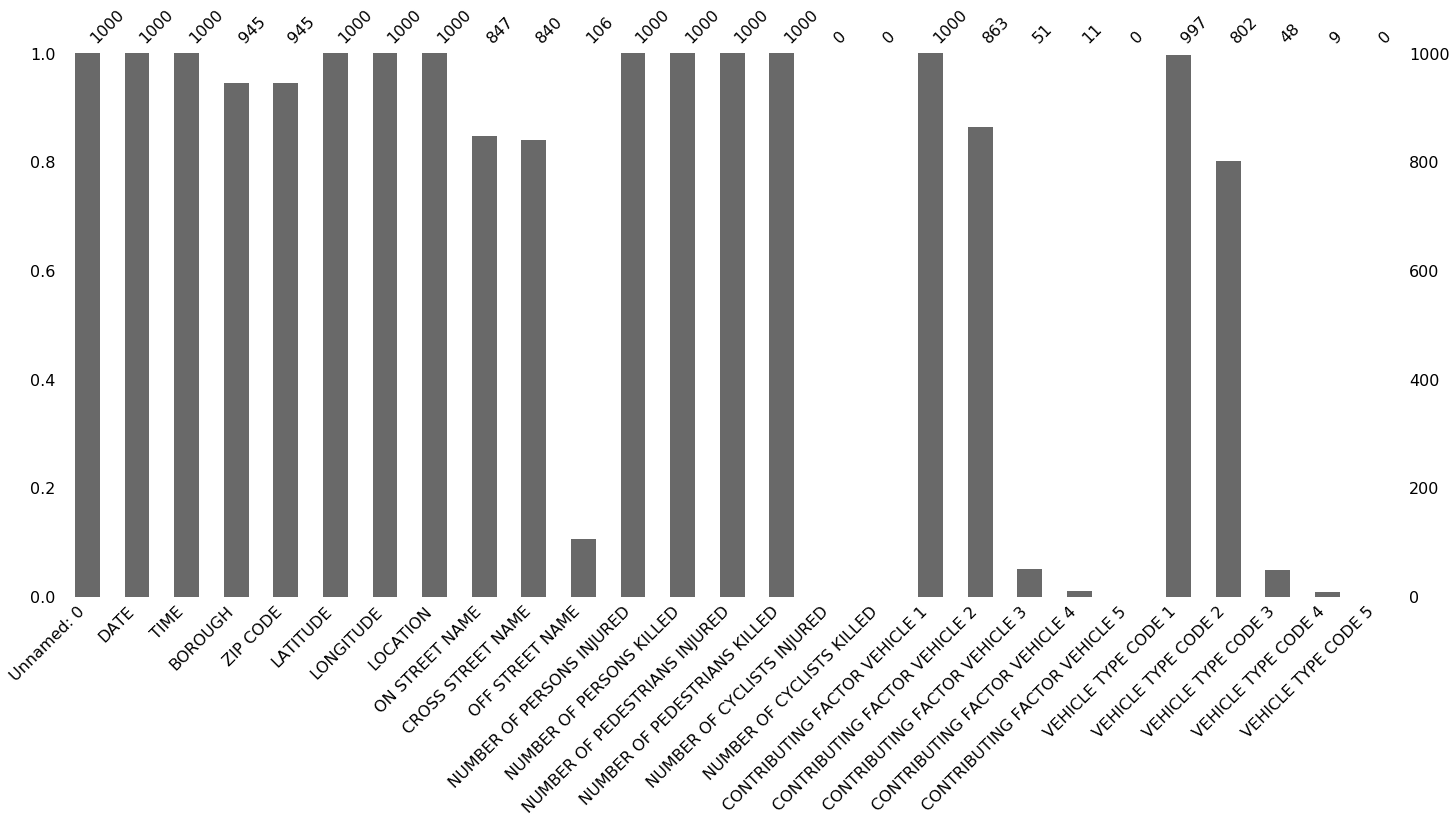

In [7]:
msno.bar(collisions.sample(1000))

## Heatmap
The missingno correlation heatmap measures **nullity correlation**: how strongly the presence or absence of one variable affects the presence of another:

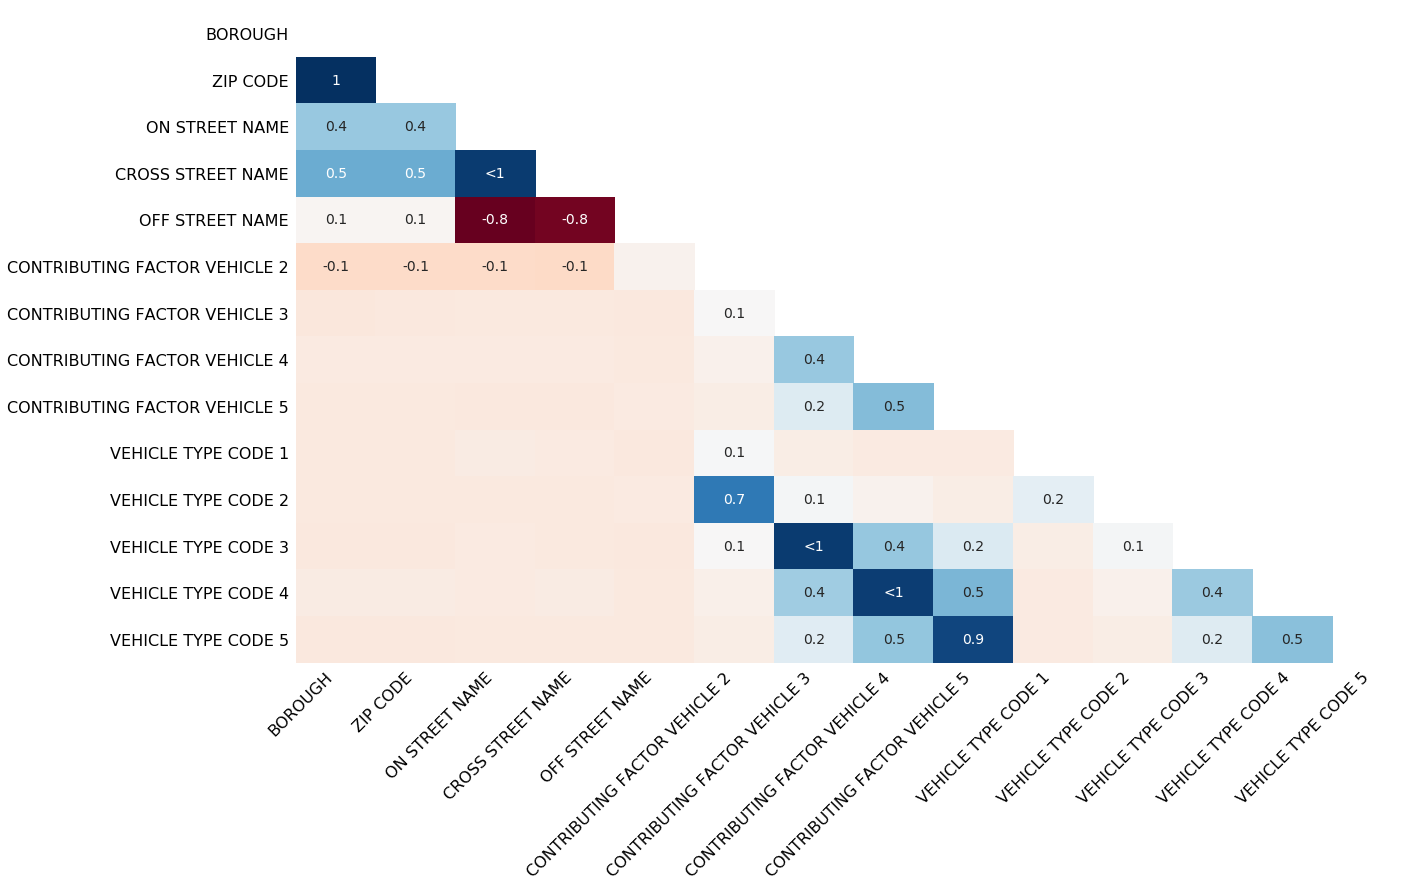

In [8]:
msno.heatmap(collisions)

In this example, it seems that reports which are filed with an OFF STREET NAME variable are less likely to have complete geographic data.

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked <1 or >-1 are have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. For example, in this dataset the correlation between VEHICLE CODE TYPE 3 and CONTRIBUTING FACTOR VEHICLE 3 is <1, indicating that, contrary to our expectation, there are a few records which have one or the other, but not both. These cases will require special attention.

The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets.

## Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

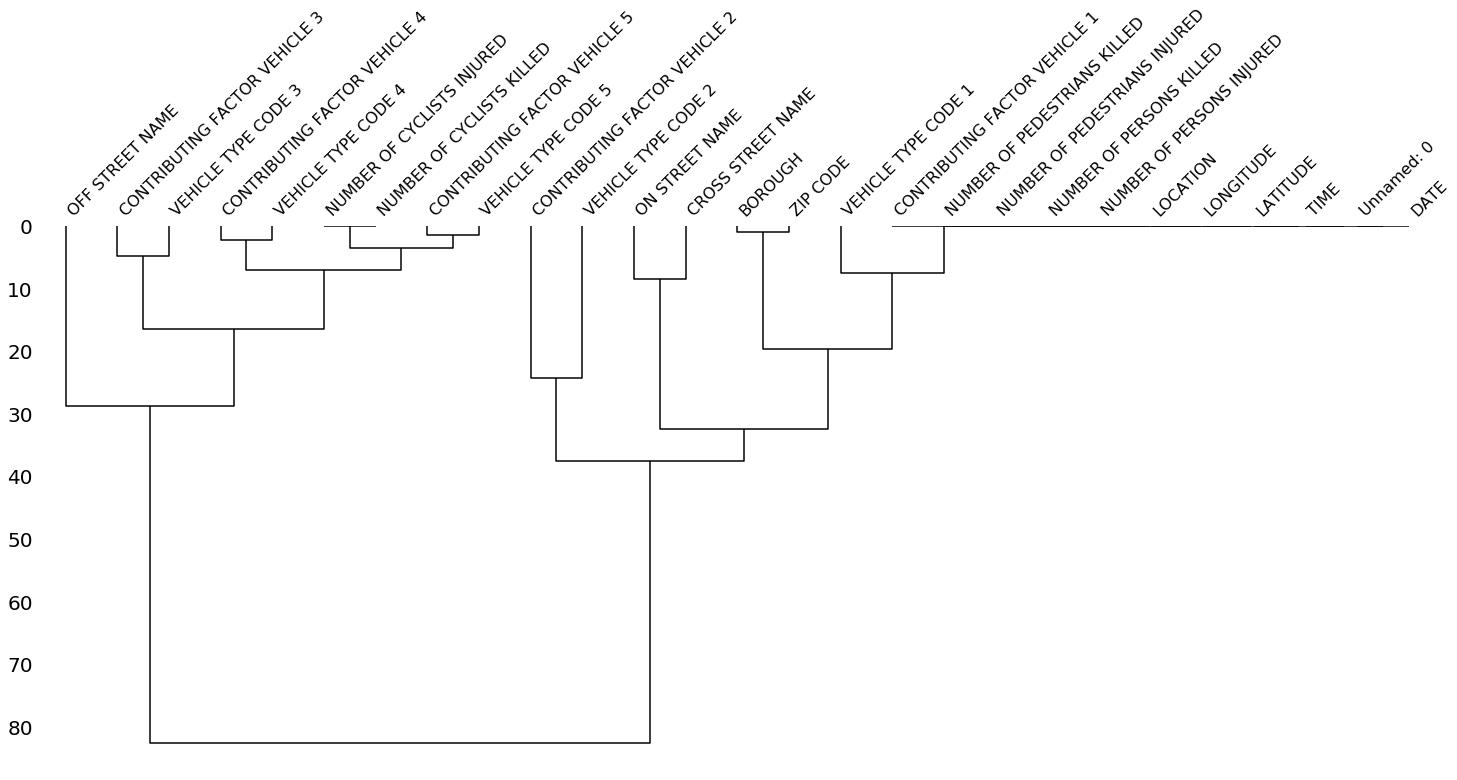

In [9]:
msno.dendrogram(collisions)

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity (for example, as CONTRIBUTING FACTOR VEHICLE 2 and VEHICLE TYPE CODE 2 ought to), then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

## Geoplot
One kind of pattern that's particularly difficult to check, where it appears, is geographic distribution. missingno supports visualizing geospatial data nullity patterns with a geoplot visualization. This is an experimental data visualization type, and requires the geoplot (https://github.com/ResidentMario/geoplot) and geopandas (http://geopandas.org/) libraries. These are optional dependencies are must be installed separately from the rest of missingno. Once you have them you can run:

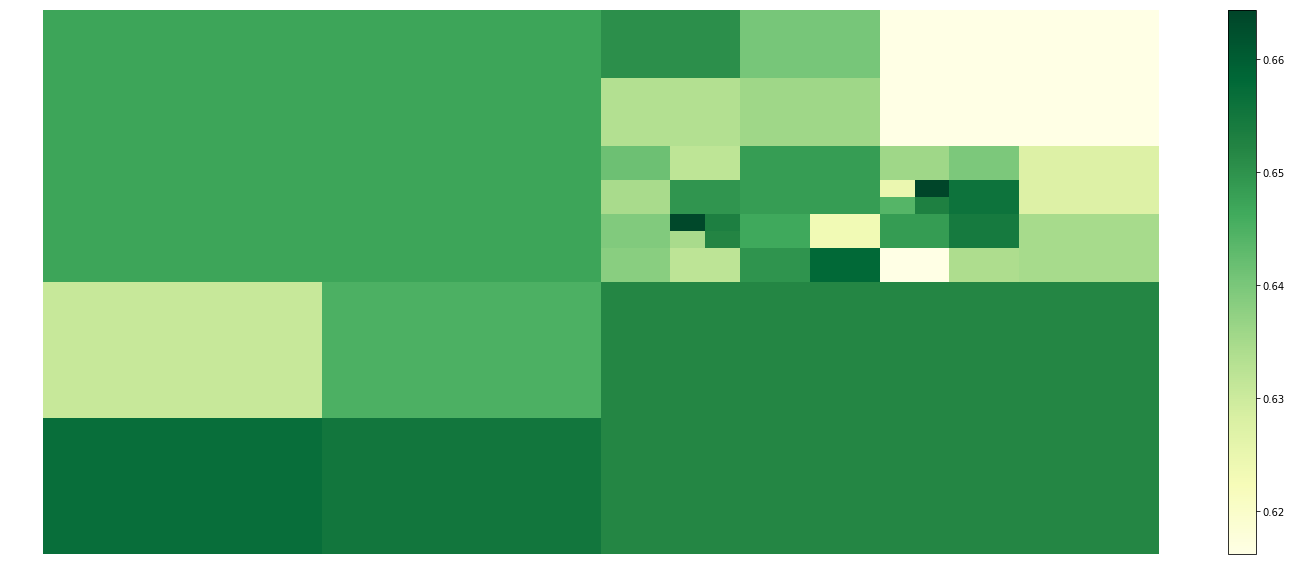

In [10]:
msno.geoplot(collisions, x='LONGITUDE', y='LATITUDE')

If no geographical context can be provided, geoplot will compute a quadtree nullity distribution, as above, which splits the dataset into statistically significant chunks and colorizes them based on the average nullity of data points within them. In this case there is good evidence that the distribution of data nullity is mostly random: the number of values left blank varies across the space by only 5 percent, and the differences look randomly distributed.

Quadtrees have the advantage that they don't require any information about the space besides latitude/longitude pairs. Given enough data (hundreds of thousands of records), a geoplot can even reconstruct the space being mapped. It works less well for small datasets like this sample one.

If you can specify a geographic grouping within the dataset, you can plot your data as a set of minimum-enclosure convex hulls instead:

/usr/local/lib/python3.7/site-packages/missingno/missingno.py:474: UserWarning: The "ZIP CODE" column included null values. The offending records were dropped
  warnings.warn('The "{0}" column included null values. The offending records were dropped'.format(by))
/usr/local/lib/python3.7/site-packages/missingno/missingno.py:481: UserWarning: Grouping by "ZIP CODE" included clusters with fewer than three points, which cannot be made polygonal. The offending records were dropped.
  'polygonal. The offending records were dropped.'.format(by))


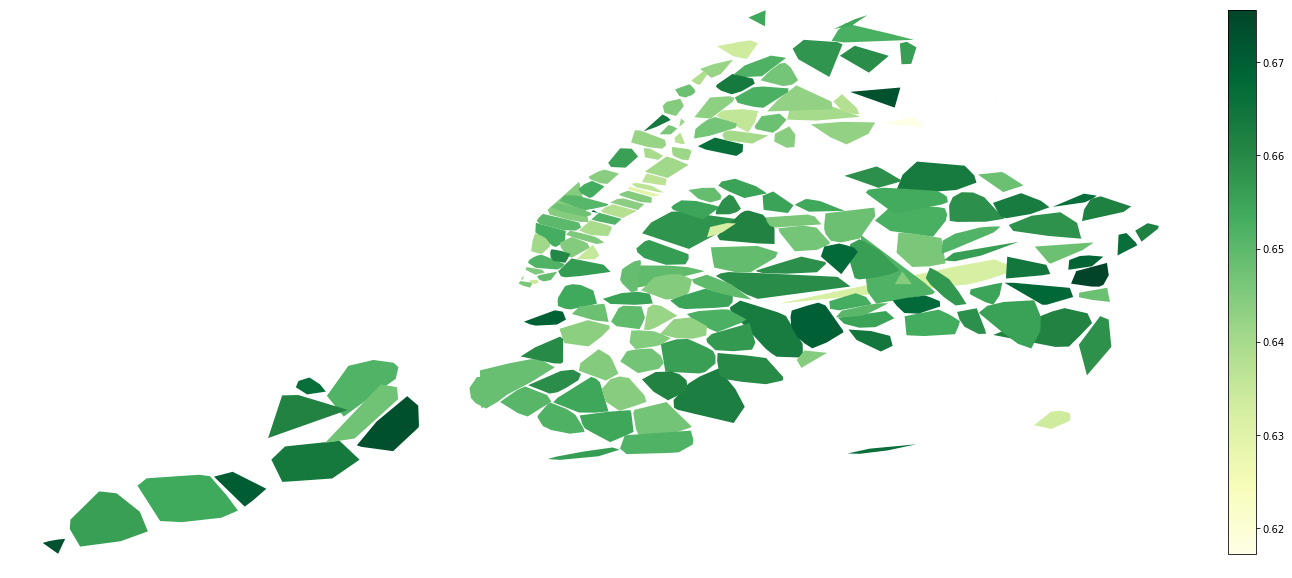

In [12]:
msno.geoplot(collisions, x='LONGITUDE', y='LATITUDE', by='ZIP CODE')